In [5]:
import time
import numpy as np
import pylab as plt
import torch
import torch.nn as nn
from dreamz.cppn import get_xy_mesh, CPPNNet, UpsampleNet


MOMENTUM = 0.99


class Wrapper(nn.Module):
    def __init__(self, m):
        super(Wrapper, self).__init__()
        self.m = m
    
    def forward(self, x, o):
        o = o.view([1, 2, 1, 1])
        o = o.repeat([x.size(0), 1, x.size(2), x.size(3)])
        x = torch.cat([x, o], 1)
        x = self.m(x)
        return x.permute(0, 2, 3, 1)

def get_targ():
    targ = np.random.rand(2).astype(np.float32) * 2.0 - 1.0
    print('new targ: ', targ)
    targ = torch.FloatTensor(targ).to(device)
    return targ


size = [108 * 1.5, 192 * 1.5]
size = [int(i) for i in size]
mesh = get_xy_mesh(size)
widths = [30] * 10
device = 'cuda'

base = CPPNNet(widths, output_channels=widths[-1], input_channels=4)
viz = UpsampleNet(base, reps=1)
state_dicts = [
    torch.load('/home/liam/dreamz/data/state_dicts/01.pth'),
    torch.load('/home/liam/dreamz/data/state_dicts/01.pth')
]
viz.load_state_dict(state_dicts[0])
m = Wrapper(viz).to(device)

mesh = mesh.to(device)

other = torch.FloatTensor([0., 0.]).to(device)
grad = torch.FloatTensor([0., 0.]).to(device)
grad_use = grad.clone()
targ = get_targ()

with torch.no_grad():
    r = m(mesh, other)

new targ:  [-0.2503938  -0.11462784]


In [8]:
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/liam/.virtualenvs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
from copy import deepcopy

In [15]:
new_state_dict = deepcopy(state_dicts[0])

In [19]:
now = time.time()
new_state_dict = deepcopy(state_dicts[0])
alpha = 0.5
for k in new_state_dict:
    new_state_dict[k] = new_state_dict[k] * alpha + state_dicts[1][k] * (1 - alpha)
viz.load_state_dict(new_state_dict)
time.time() - now

0.014624834060668945

In [11]:
m.state_dict()

OrderedDict([('m.base_model.layers.0.conv0.weight', tensor([[[[-0.0394]],
              
                       [[ 0.4598]],
              
                       [[-0.5250]],
              
                       [[-0.6872]]],
              
              
                      [[[-0.4847]],
              
                       [[ 0.5328]],
              
                       [[ 0.7329]],
              
                       [[-0.1222]]],
              
              
                      [[[-0.0201]],
              
                       [[ 0.2087]],
              
                       [[ 0.5613]],
              
                       [[-0.0289]]],
              
              
                      [[[ 0.1677]],
              
                       [[ 0.0892]],
              
                       [[ 0.7693]],
              
                       [[-0.2106]]],
              
              
                      [[[-0.4462]],
              
                       [[-0.463

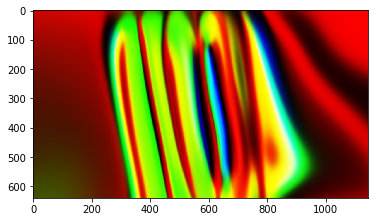

In [10]:
plt.imshow(r[0].cpu().numpy())